In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.helpers import melt_df

ml_latest_small = pd.read_csv('./output/prediction_algo_exp/ml-latest-small.csv')
ml_1m = pd.read_csv('./output/prediction_algo_exp/ml-1m.csv')
ml_latest_v2 = pd.read_csv('./output/prediction_algo_exp/ml-latest-v2.csv')
personality = pd.read_csv('./output/prediction_algo_exp/personality.csv')

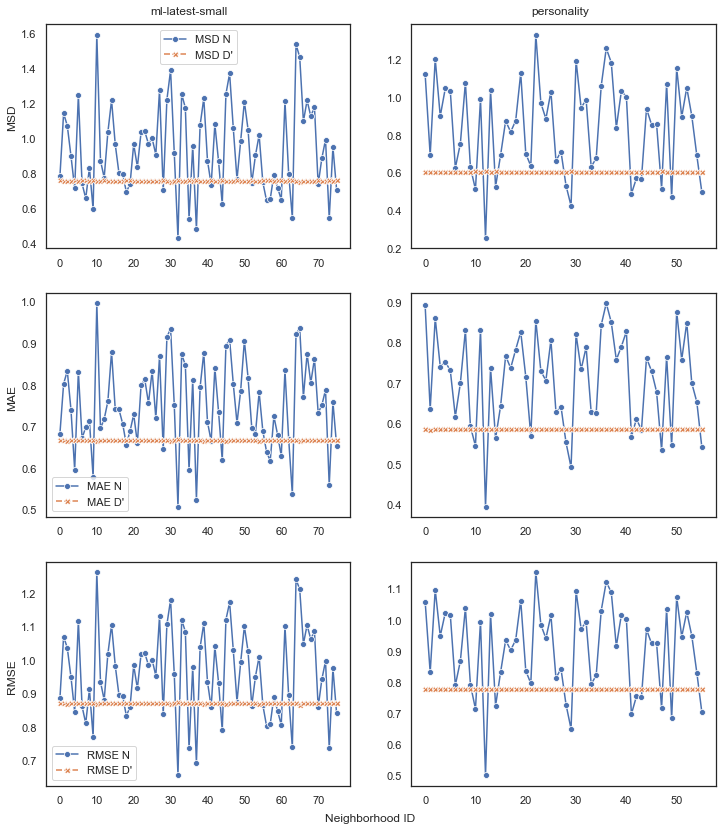

In [94]:
sns.set_theme(style="white") # white, dark, whitegrid, darkgrid, ticks
df_mse_mls = melt_df(ml_latest_small, ['mse_nbhd','mse_equiv'])
df_mae_mls = melt_df(ml_latest_small, ['mae_nbhd','mae_equiv'])
df_rmse_mls = melt_df(ml_latest_small, ['rmse_nbhd','rmse_equiv'])
df_msd_p = melt_df(personality, ['mse_nbhd','mse_equiv'])
df_mae_p = melt_df(personality, ['mae_nbhd','mae_equiv'])
df_rmse_p = melt_df(personality, ['rmse_nbhd','rmse_equiv'])


fig, ax = plt.subplots(3,2, figsize=(12, 14))
sns.lineplot(x=df_mse_mls.Index, y="Value", hue="Variable", data=df_mse_mls, ax=ax[0,0], markers=True, style="Variable")
sns.lineplot(x=df_mae_mls.Index, y="Value", hue="Variable", data=df_mae_mls, ax=ax[1,0], markers=True, style="Variable")
sns.lineplot(x=df_rmse_mls.Index, y="Value", hue="Variable", data=df_rmse_mls, ax=ax[2,0], markers=True, style="Variable")
sns.lineplot(x=df_msd_p.Index, y="Value", hue="Variable", data=df_msd_p, ax=ax[0,1], markers=True, style="Variable")
sns.lineplot(x=df_mae_p.Index, y="Value", hue="Variable", data=df_mae_p, ax=ax[1,1], markers=True, style="Variable")
sns.lineplot(x=df_rmse_p.Index, y="Value", hue="Variable", data=df_rmse_p, ax=ax[2,1], markers=True, style="Variable")

fig.text(0.5, 0.09, 'Neighborhood ID', ha='center')
fig.text(0.29, 0.89, 'ml-latest-small', ha='center')
fig.text(0.72, 0.89, 'personality', ha='center')
fig.text(0.08, 0.2337, 'RMSE', va='center', rotation='vertical')
fig.text(0.08, 0.51, 'MAE', va='center', rotation='vertical')
fig.text(0.08, 0.788, 'MSD', va='center', rotation='vertical')

# Legend labels
ax[0,0].legend(labels=['MSD N', 'MSD D\''])
ax[1,0].legend(labels=['MAE N', 'MAE D\''])
ax[2,0].legend(labels=['RMSE N', 'RMSE D\''])

for i in range(0, 3):
    for j in range(0, 2):
        # remove all x and y labels
        ax[i,j].set(xlabel=None)
        ax[i,j].set(ylabel=None)

        # only keep legend for first row
        if j == 0:
            continue
        ax[i,j].get_legend().remove()

plt.savefig('./output/prediction_algo_exp/exp_1_small_ds.png', dpi=800, bbox_inches='tight')

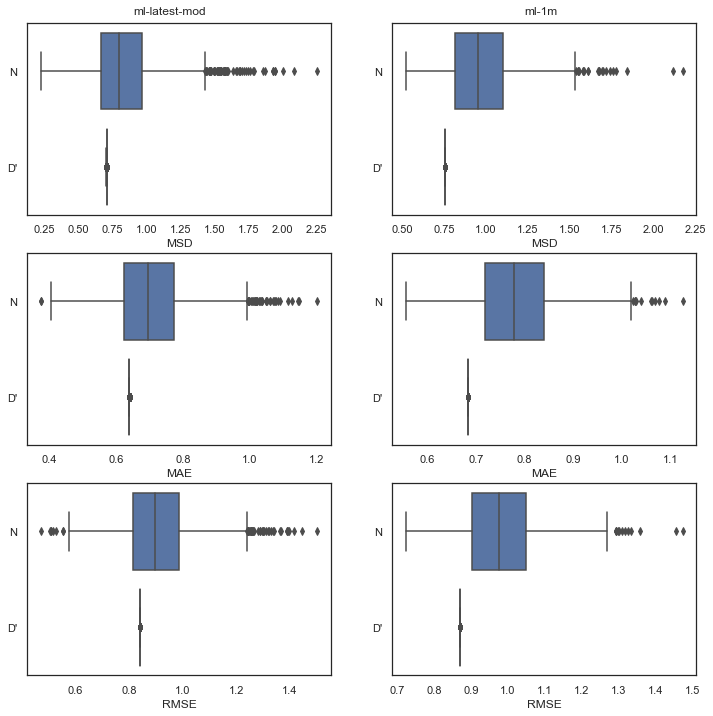

In [92]:
sns.set_theme(style="white") # white, dark, whitegrid, darkgrid, ticks

fig, ax =plt.subplots(3,2, figsize=(12, 12))
box_plot_mse_mlv2 = ml_latest_v2[['mse_nbhd','mse_equiv']].rename(columns={'mse_nbhd':'N', 'mse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
box_plot_mae_mlv2 = ml_latest_v2[['mae_nbhd','mae_equiv']].rename(columns={'mae_nbhd':'N', 'mae_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
box_plot_rmse_mlv2 = ml_latest_v2[['rmse_nbhd','rmse_equiv']].rename(columns={'rmse_nbhd':'N', 'rmse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
box_plot_mse_ml1m = ml_1m[['mse_nbhd','mse_equiv']].rename(columns={'mse_nbhd':'N', 'mse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
box_plot_mae_ml1m = ml_1m[['mae_nbhd','mae_equiv']].rename(columns={'mae_nbhd':'N', 'mae_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)
box_plot_rmse_ml1m = ml_1m[['rmse_nbhd','rmse_equiv']].rename(columns={'rmse_nbhd':'N', 'rmse_equiv':'D\''}).reset_index().melt(id_vars='index').rename(columns=str.title)

sns.boxplot(x="Value", y="Variable", data=box_plot_mse_mlv2, ax=ax[0,0])
sns.boxplot(x="Value", y="Variable", data=box_plot_mae_mlv2, ax=ax[1,0])
sns.boxplot(x="Value", y="Variable", data=box_plot_rmse_mlv2, ax=ax[2,0])
sns.boxplot(x="Value", y="Variable", data=box_plot_mse_ml1m, ax=ax[0,1])
sns.boxplot(x="Value", y="Variable", data=box_plot_mae_ml1m, ax=ax[1,1])
sns.boxplot(x="Value", y="Variable", data=box_plot_rmse_ml1m, ax=ax[2,1])

fig.text(0.29, 0.89, 'ml-latest-mod', ha='center')
fig.text(0.72, 0.89, 'ml-1m', ha='center')

for i in range(0, 3):
    for j in range(0, 2):
        # remove all x and y labels
        ax[i,j].set(ylabel=None)

ax[0,0].set_xlabel("MSD")
ax[1,0].set_xlabel("MAE")
ax[2,0].set_xlabel("RMSE")
ax[0,1].set_xlabel("MSD")
ax[1,1].set_xlabel("MAE")
ax[2,1].set_xlabel("RMSE")

plt.savefig('./output/prediction_algo_exp/exp_1_big_ds.png', dpi=800, bbox_inches='tight')

In [ ]:
# box_plot_mse_mlv2['dataset'] = 'mlv2'
# box_plot_mse_ml1m['dataset'] = 'ml1m'

# test_df = box_plot_mse_ml1m.append(box_plot_mse_mlv2)
# test_df
# sns.boxplot(x="Value", y="Variable", hue="dataset", data=test_df)